<a href="https://colab.research.google.com/github/SimonT2003/MAT422/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Regression Analysis Approach for Predicting Whether the Cancer is Benign or Malignant**

### By Simon Tran, MAT 422

#### November 12, 2023

## **Introduction**

***Cancer*** is a disease in which cells in the body grow out of control. Except for skin cancer, **breast cancer** is the most common cancer in women in the United States. But men can get breast cancer, too.

It can start in one or both breasts. It's important to understand that most breast lumps are benign and not cancer (malignant). Non-cancer breast tumors are abnormal growths, but they do not spread outside of the breast. They are not life threatening, but some types of benign breast lumps can increase a woman's risk of getting breast cancer.

Deaths from breast cancer have declined over time, but breast cancer remains the second leading cause of cancer death among women overall and the leading cause of cancer death among Hispanic women.

Each year in the United States, about 240,000 cases of breast cancer are diagnosed in women and about 2,100 in men. About 42,000 women and 500 men in the U.S. die each year from breast cancer. Black women have a higher rate of death from breast cancer than all other women.



There are several ways to perform classification prediction on cancer datasets, and the choice of method often depends on factors such as the nature of the data, the size of the dataset, and the specific goals of the analysis.

One popular and most common technique is **logistic regression**. It is used for binary classification, and it models the probability of the binary outcome using a logistic function.

Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit($π$) = log($\frac{π}{1-π}$) = $β_0 + β_1x_1+...+β_kx_k$


In this paper, we will develop a Logistic Regression model to try classifying suspected cells to Benign or Malignant.

The contents of this paper will follow the outline below:

1. **Introduction**
2. **Related Work**
3. **Proposed Methodology**
4. **Experiment Setups and Result Discussion**
5. **Comparison**
6. **Conclusion**

## **Related Work**

Various scholars have used logistic regression for predicting whether a given cell is malignant or benign. But our ways may be different than that of others.

Some scholars performed a classification task using Logistic Regression and employed Recursive Feature Elimination (RFE) for feature selection. The data was first divided into training and test sets. Logistic Regression was then applied to the training data using GridSearchCV, a function from the sklearn library that automates the process of hyperparameter tuning for model optimization. Feature selection is crucial for model performance improvement, and the researchers opted for RFE as a technique. RFE involves recursively training the data for a specific model, selecting individual features based on their importance, and using this set of important features to enhance the model's performance. The motivation behind using RFE is to address the challenge of choosing optimal features for training, as other methods like Principal Component Analysis may not clearly identify the individual features used to calculate principal components.

In summary, the Logistic Regression model was evaluated with a 5-fold cross-validation, using accuracy as the hyperparameter. The chosen threshold for classification was set at greater than 0.53, aiming to achieve a recall of 98%. The performance scores indicated a focus on maximizing precision while detecting all malignant tumors, leading to a high recall value. To further enhance the classifier's performance, the researchers proposed combining or ensembling two or more models with a 5-fold cross-validation and selecting an optimal threshold greater than 0.5. The precision-recall curve was mentioned as a tool to visualize the tradeoff between precision and recall for different thresholds. A high area under the curve was emphasized, indicating both high recall and high precision, demonstrating that the classifier is returning accurate results with a low false positive rate and capturing a majority of all positive results for the chosen threshold.

## **Proposed Methodology**

We discuss the proposed work in this part, which encompasses several
phases such as importing dataset, basic E.D.A, feature selection, and logistic regression models.

### **Dataset**
> The breast cancer Wisconsin dataset has been collected from UCI Machine Learning Repository. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/.

> The dataset has 32 variables and 569 observations.

> There are no missing attribute values.

> The response variable of interest is "diagnosis" which is binary (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius: distances from center to points on the perimeter
* texture: standard deviation of gray-scale values
* perimeter
* area
* smoothness: local variation in radius lengths
* compactness: perimeter^2 / area - 1.0
* concavity: severity of concave portions of the contour
* concave points: number of concave portions of the contour
* symmetry
* fractal dimension: "coastline approximation" - 1

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### **Basic EDA**

> We will discuss the basic explanorty data analysis below.

### **Feature Selection**

> Similarily, we will discuss and run the model with all the given predictors. We will soon realize that not all predictors are important and we will need to omit them from our model.

### **Logistic Regression Models**

> After the feature selection, we will create a logistic regression with the important predictors.





## **Experiment Setups and Result Discussion**

This part presents the experimental setting and experimental findings and analysis.

We will run this experiment in Python.

* **Note**: The following codes were written by a user from Kaggle, which I credited them in the reference page.

I just modified their analysis.

In [ ]:
# import dependencies
# data cleaning and manipulation
import pandas as pd
import numpy as np
import requests
import io

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

In [ ]:
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/SimonT2003/MAT422/main/BreastCancerWisconsin.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

print(df.shape)

print(list(df.columns))


(569, 33)
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [ ]:
# Printing out the first 5 rows of the dataframe
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

The last column, Unnamed:32, seems like it has missing values. Let's quickly check for any missing values for other columns as well.

In [ ]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

It looks like our data does not contain any missing values, except for our suspect column Unnamed: 32, which is full of missing values. So let's remove this column entirely. After that, let's check for the data type of each column.

In [ ]:
# remove the 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis=1)

In [ ]:
# check the data type of each column
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Our response variable, diagnosis, is categorical and has two classes, 'B' (Benign) and 'M' (Malignant). All predictors are numerical, so we can skip data type conversion.

Let's now take a closer look at our response variable, since it is the main focus of our analysis. We begin by checking out the distribution of its classes.

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

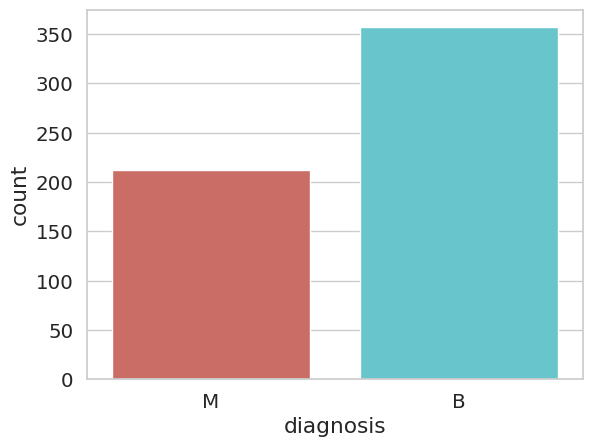

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='diagnosis', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

Out of the 569 observations, 357 (or 62.7%) have been labeled benign, while the rest 212 (or 37.3%) have been labeled malignant. Later when we develop a predictive model and test it on unseen data, we should expect to see a similar proportion of labels.

Although our dataset has 30 columns excluding the id and the diagnosis columns, they are all in fact very closely related since they all contain information on the same 10 key attributes but only differ in terms of their perspectives (i.e., the mean, standard errors, and the mean of the three largest values denoted as "worst").

In this sense, we could attempt to dig out some quick insights by analyzing the data in only one of the three perspectives. For instance, we could choose to check out the relationship between the 10 key attributes and the diagnosis variable by only choosing the "mean" columns.

Let's quickly scan for any interesting patterns between our 10 "mean" columns and the response variable by generating a scatter plot matrix as shown below:

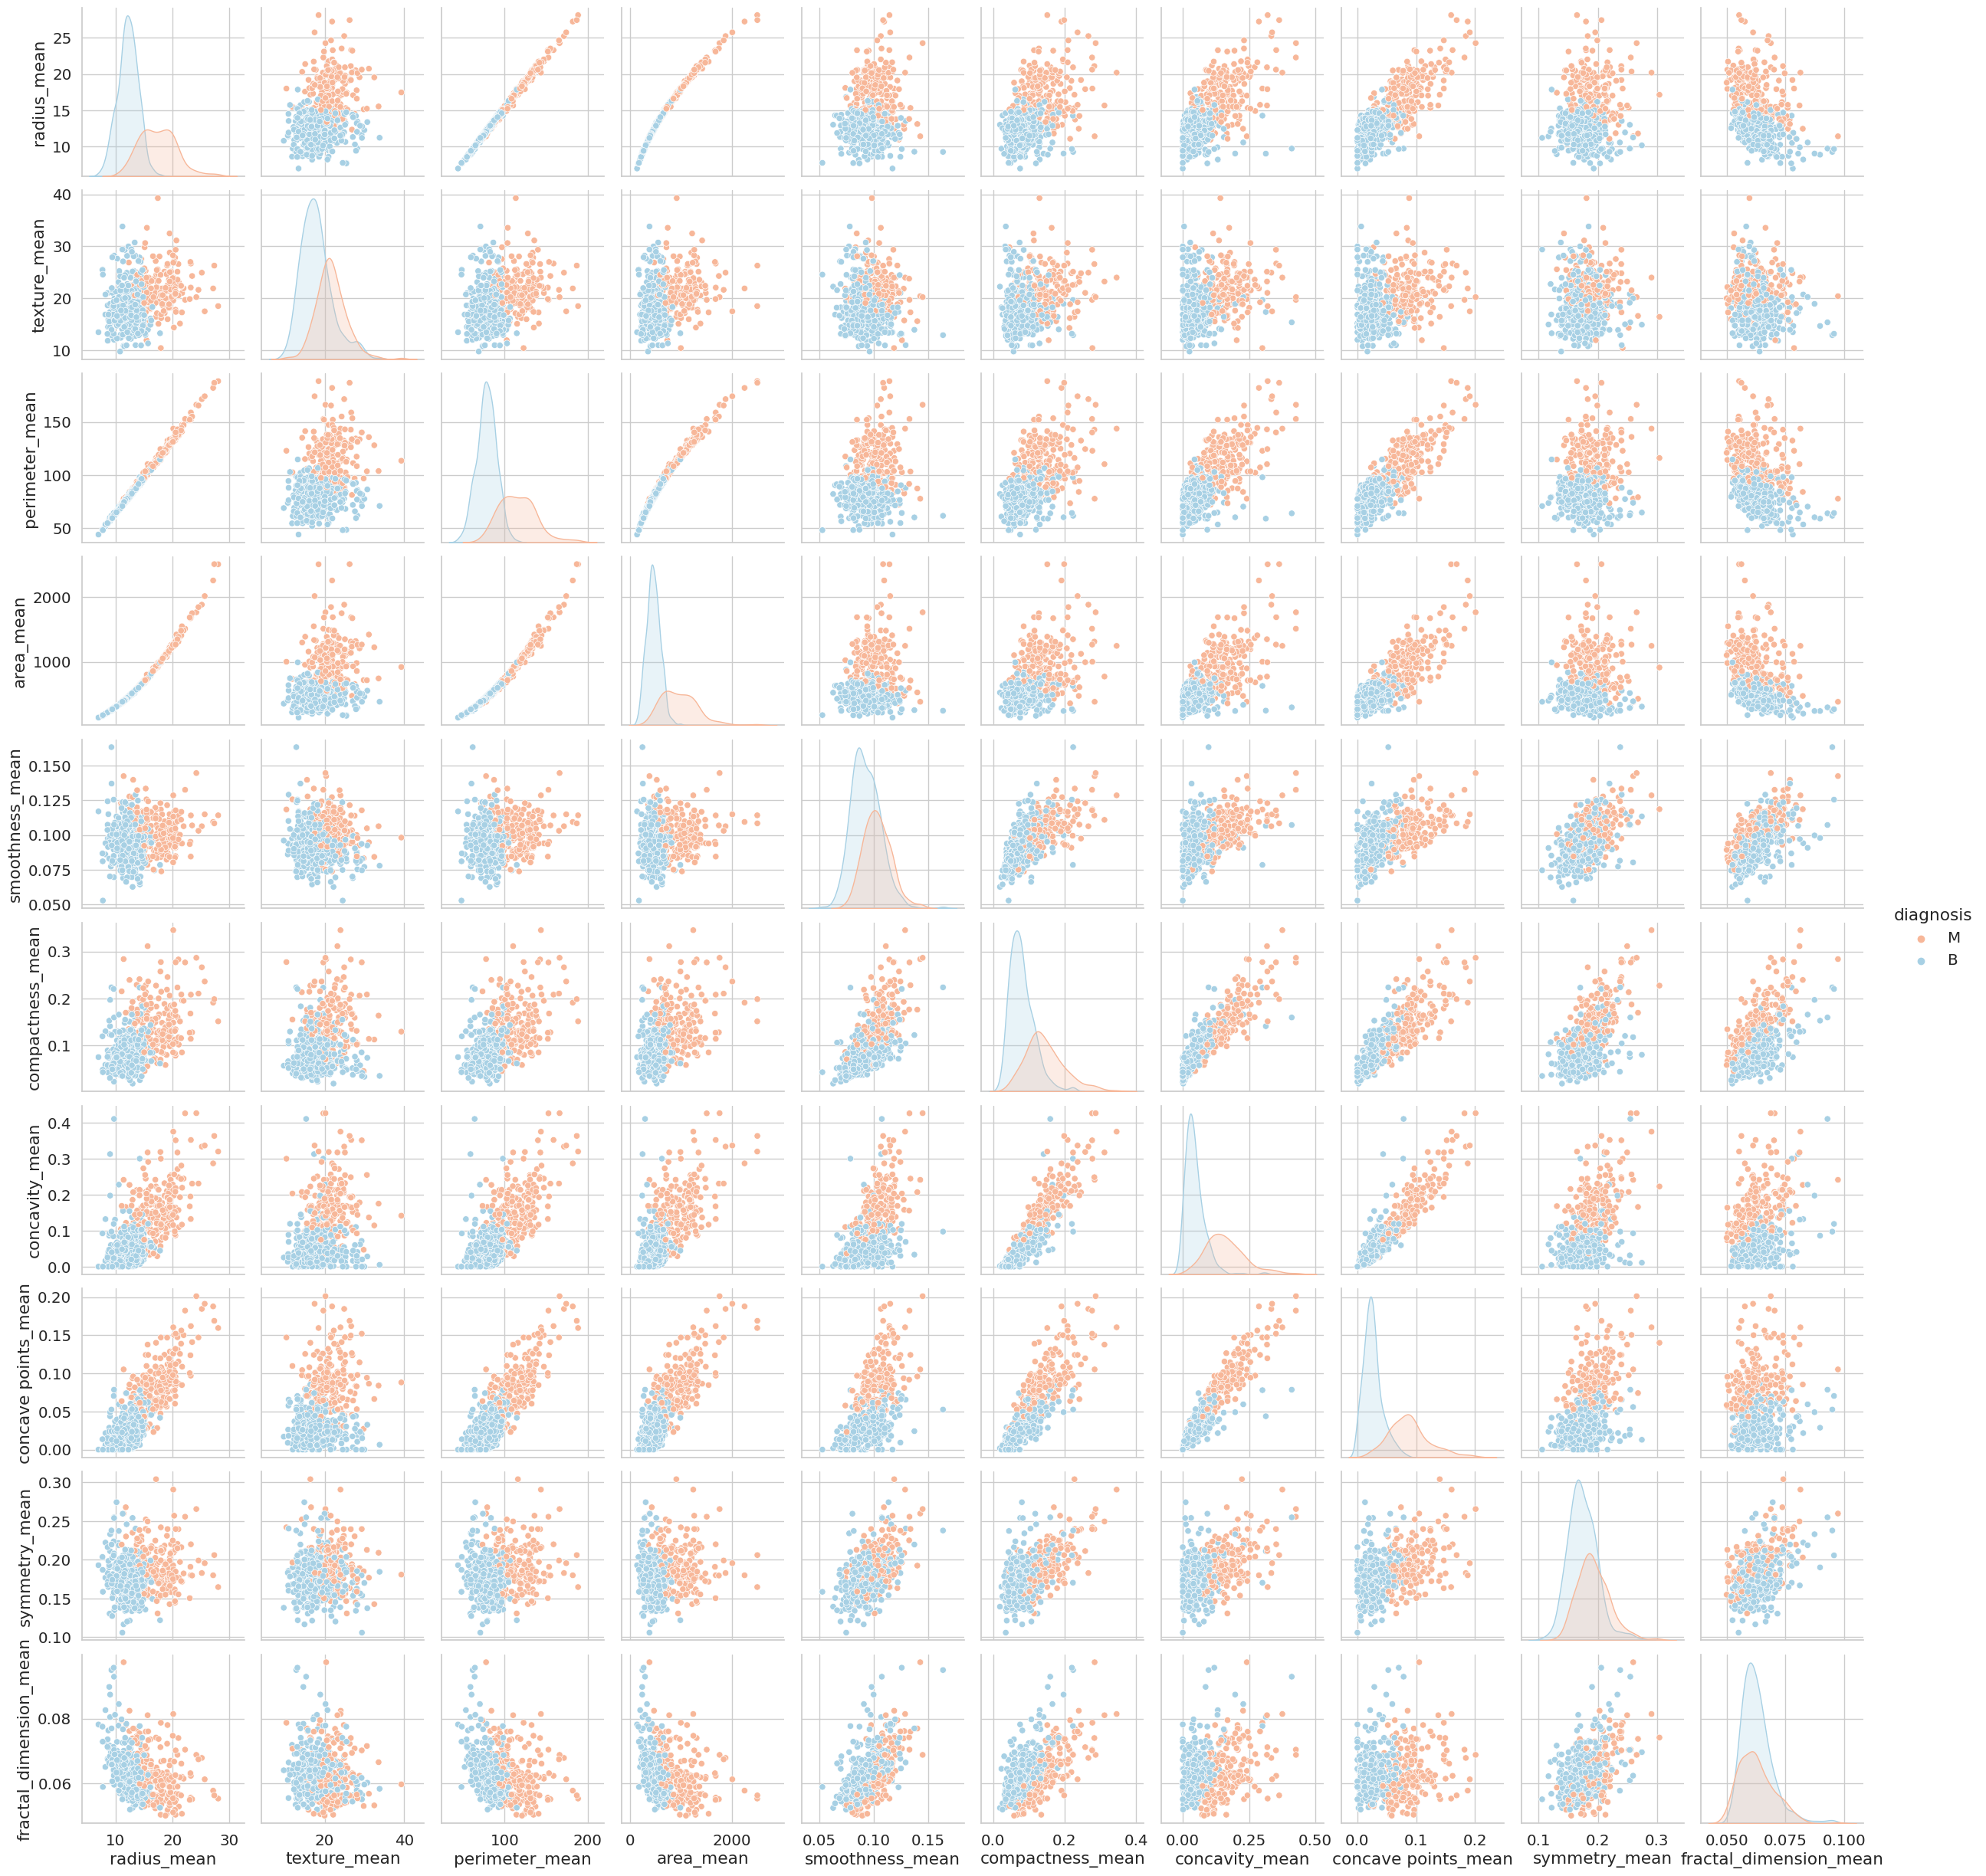

In [ ]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the radius, perimeter and area attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

In the coming up section, we will generate a matrix similar to the one above, but this time displaying the correlations between the variables instead of a scatter plot. Let's find out if our hypothesis about the multicollinearity has any statistical support.

let's take a look at the correlations between our variables. This time, however, we will create a correlation matrix with all variables (i.e., the "mean" columns, the "standard errors" columns, as well as the "worst" columns).

<ipython-input-46-b568bacb2ac8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)
<ipython-input-46-b568bacb2ac8>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


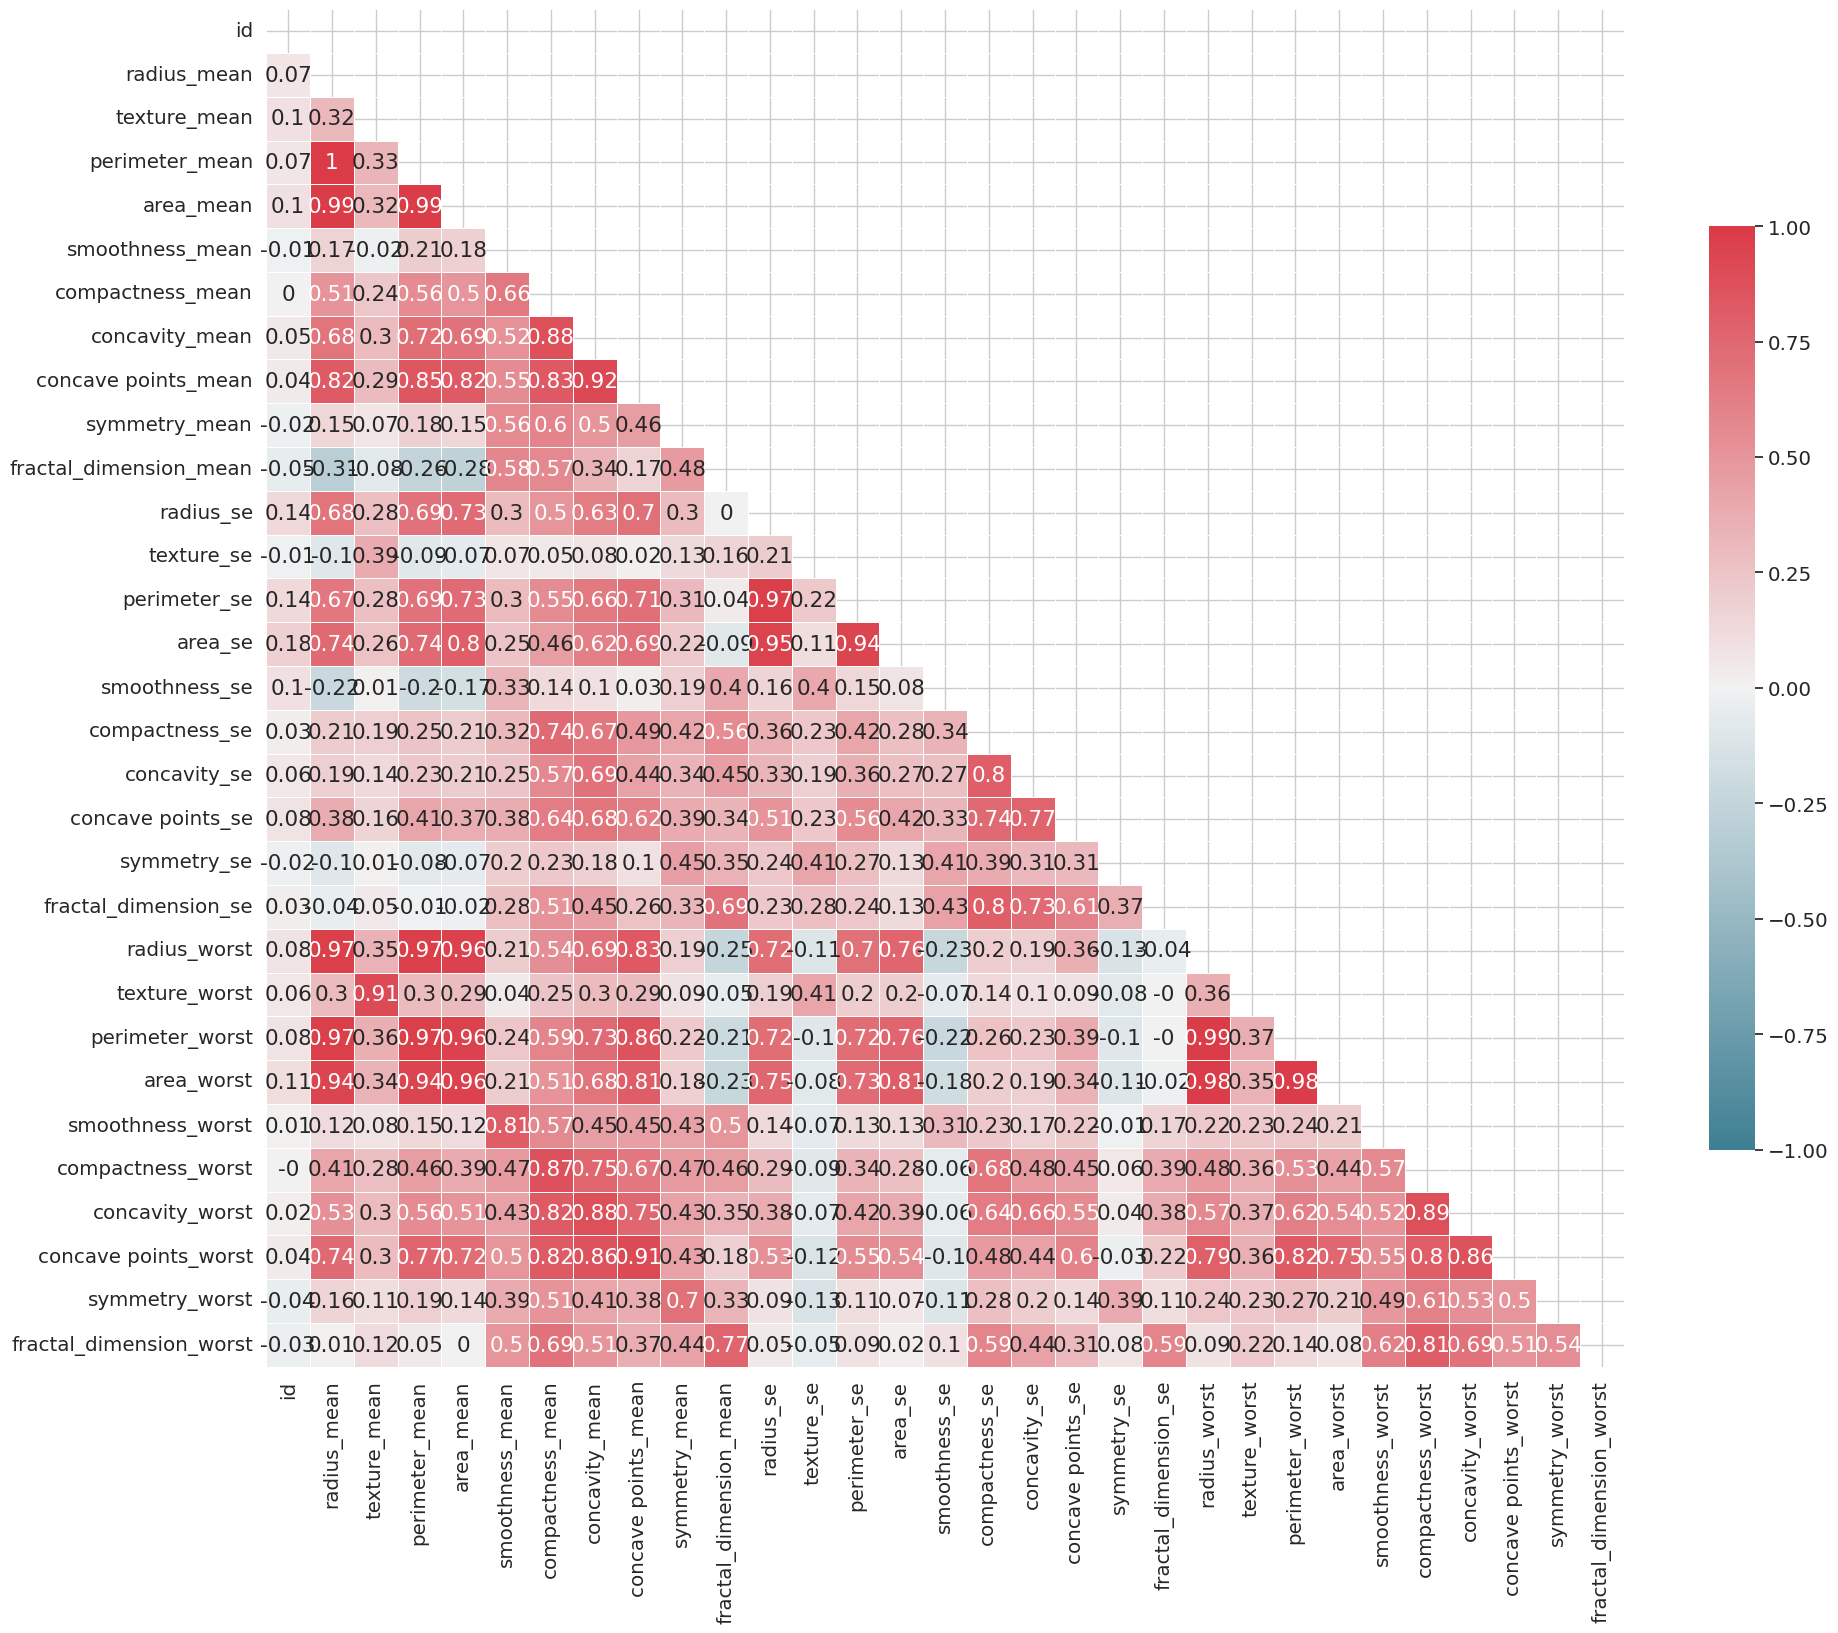

In [ ]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Looking at the matrix, we can immediately verify the presence of multicollinearity between some of our variables. For instance, the radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis.

Another place where multicollienartiy is apparent is between the "mean" columns and the "worst" column. For instance, the radius_mean column has a correlation of 0.97 with the radius_worst column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is somewhat inevitable, because the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, we should discard the "worst" columns from our analysis and only focus on the "mean" columns.

In short, we will drop all "worst" columns from our dataset, then pick only one of the three attributes that describe the size of cells. But which one should be pick?

It seems like there is multicollinearity between the attributes compactness, concavity, and concave points. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell. I think compactness is an attribute name that is straightforward, so I will remove the other two attributes.

We will now go head and drop all unnecessary columns.

In [ ]:
# first, drop all "worst" columns
cols = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

Let's take a look at the correlation matrix once again, this time created with our trimmed-down set of variables.

<ipython-input-72-d6ac4485b1df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)
<ipython-input-72-d6ac4485b1df>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


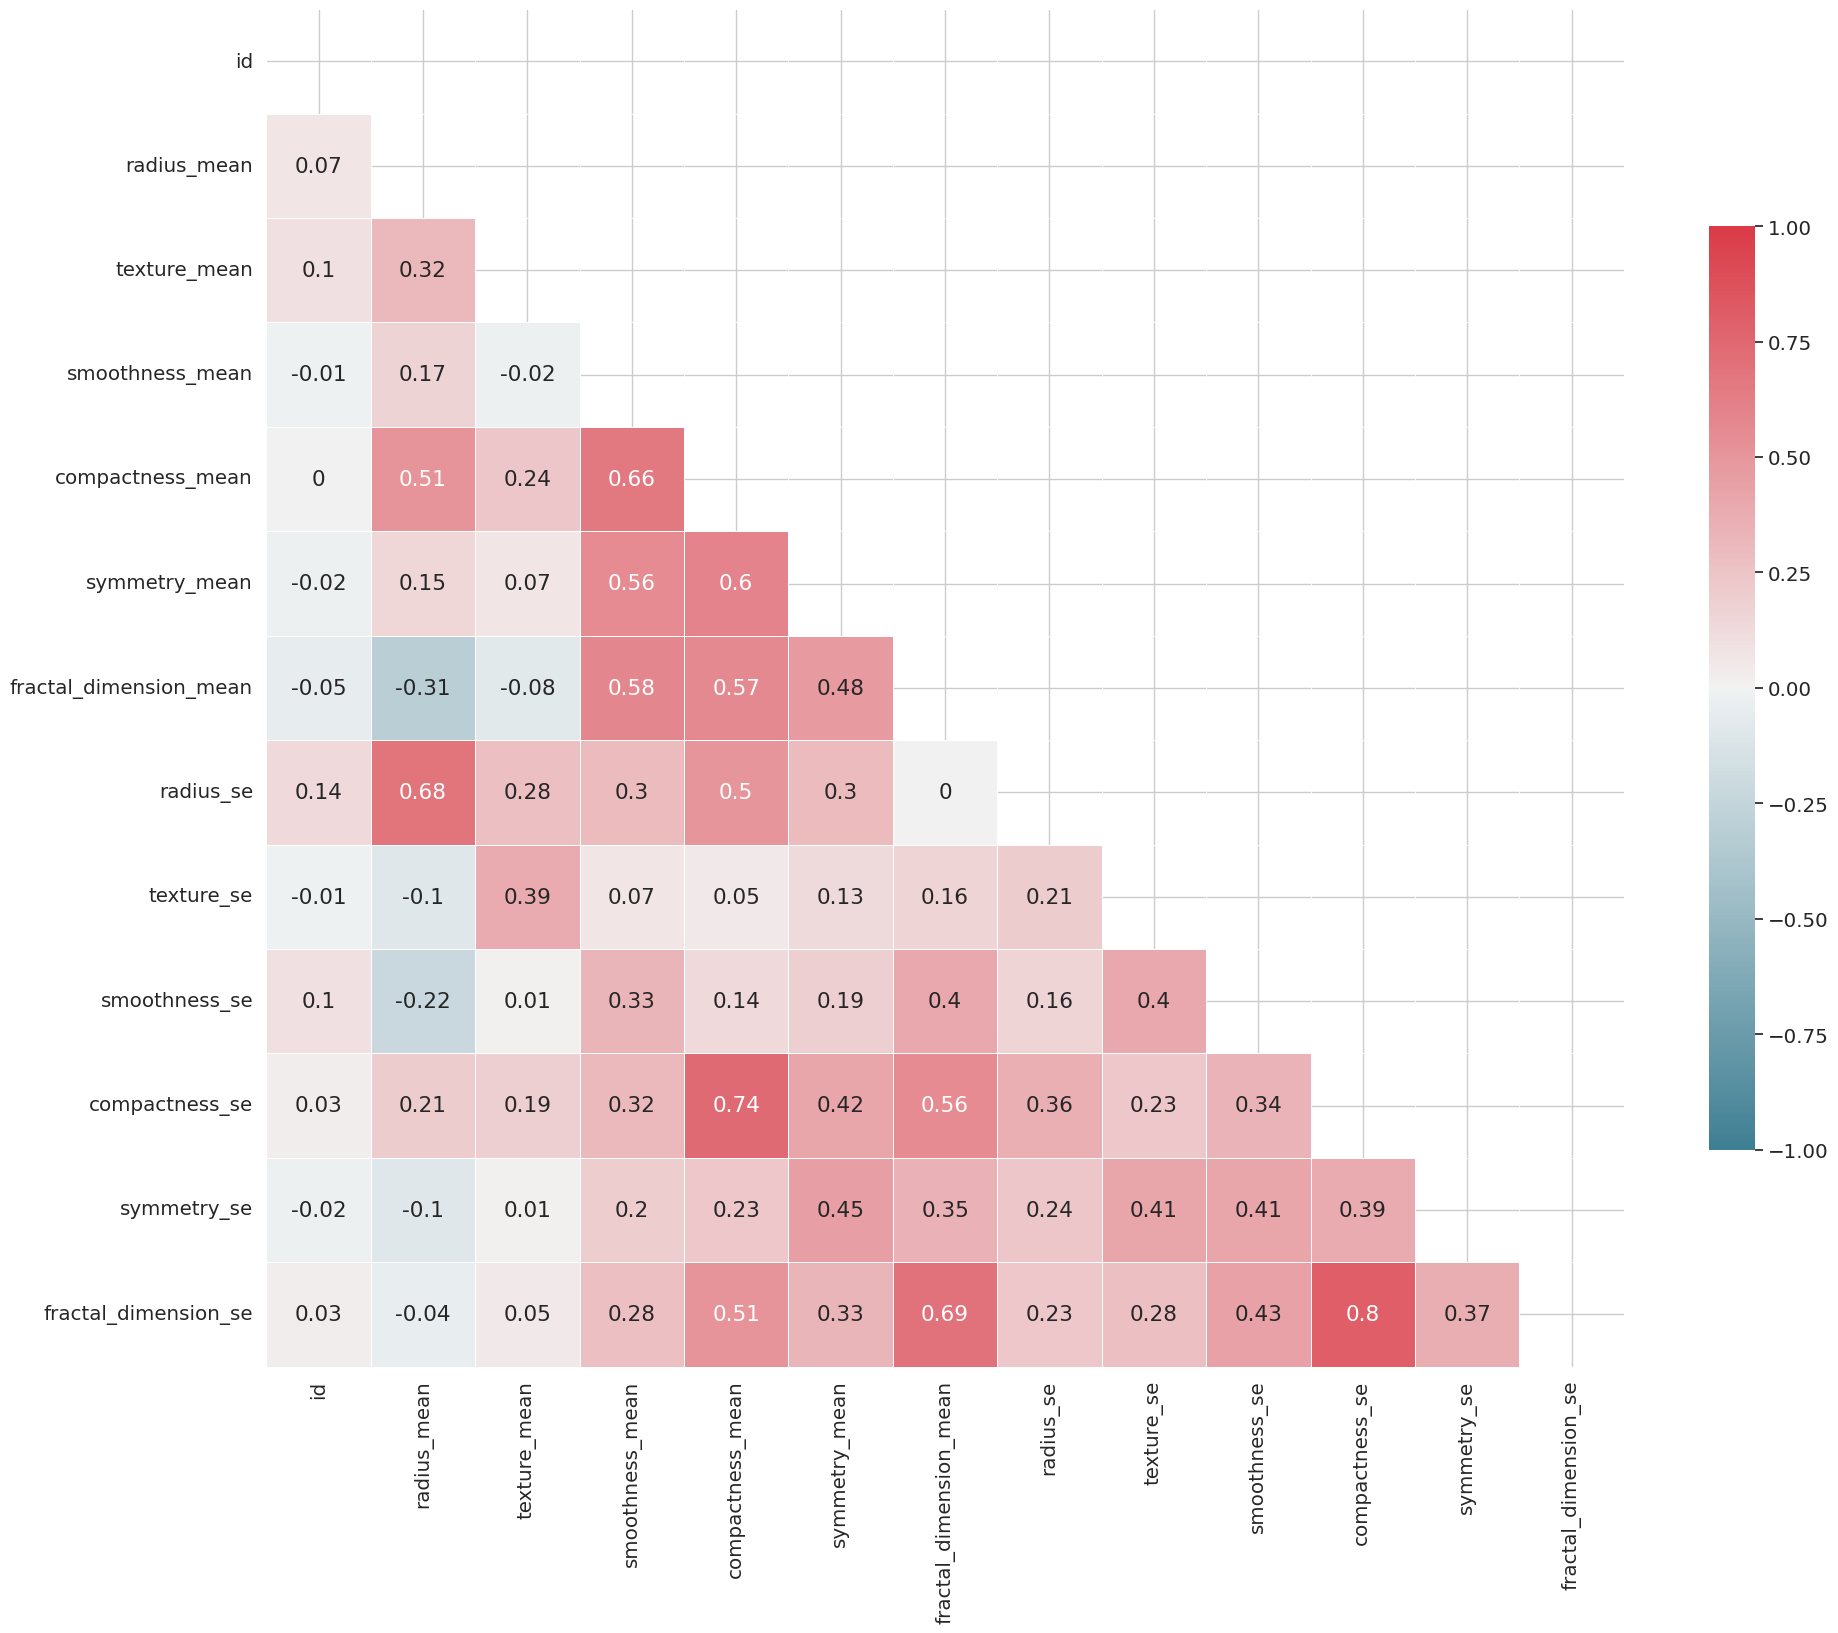

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

We will start by first splitting our dataset into two parts; one as a training set for the model, and the other as a test set to validate the predictions that the model will make. If we omit this step, the model will be trained and tested on the same dataset, and it will underestimate the true error rate, a phenomenon known as overfitting. It is like writing an exam after taking a look at the questions and answers beforehand. We want to make sure that our model truly has predictive power and is able to accurately label unseen data. We will set the test size to 0.3; i.e., 70% of the data will be assigned to the training set, and the remaining 30% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 40.

In [ ]:
# Split the data into training and testing sets
X = df
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Now that we have split our data into appropriate sets, let's write down the formula to be used for the logistic regression.

In [ ]:
# Create a string for the formula
cols = df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ id + radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



The formula includes all of the variables that were finally selected at the end of the previous section. We will now run the logistic regression with this formula and take a look at the results.

In [ ]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      384
Model Family:                              Binomial   Df Model:                           13
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -55.165
Date:                              Thu, 23 Nov 2023   Deviance:                       110.33
Time:                                      18:15:47   Pearson chi2:                     124.
No. Iterations:                                   9   Pseudo R-squ. (CS):             0.6542
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

We have successfully developed a logistic regression model. This model can take some unlabeled data and effectively assign each observation a probability ranging from 0 to 1. This is the key feature of a logistic regression model. However, for us to evaluate whether the predictions are accurate, the predictions must be encoded so that each instance can be compared directly with the labels in the test data. In other words, instead of numbers between 0 or 1, the predictions should show "M" or "B", denoting malignant and benign respectively. In our model, a probability of 1 corresponds to the "Benign" class, whereas a probability of 0 corresponds to the "Malignant" class. Therefore, we can apply a threshhold value of 0.5 to our predictions, assigning all values closer to 0 a label of "M" and assigniing all values closer to 1 a label of "B".

In [ ]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(X_test)
predictions[1:6]

16     0.310367
431    0.996925
453    0.965294
15     0.000716
275    0.833502
dtype: float64

In [ ]:
# Note how the values are numerical.
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[1:6]

['M', 'B', 'B', 'M', 'B']

We can confirm that probabilities closer to 0 have been labeled as "M", while the ones closer to 1 have been labeled as "B". Now we are able to evaluate the accuracy of our predictions by checking out the classification report and the confusion matrix.

In [ ]:
print(classification_report(y_test, predictions_nominal, digits=3))

cfm = confusion_matrix(y_test, predictions_nominal)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions',
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')

              precision    recall  f1-score   support

           B      0.974     0.974     0.974       115
           M      0.946     0.946     0.946        56

    accuracy                          0.965       171
   macro avg      0.960     0.960     0.960       171
weighted avg      0.965     0.965     0.965       171

Confusion Matrix: 
 [[112   3]
 [  3  53]] 

True Negative: 112
False Positive: 3
False Negative: 3
True Positive: 53
Correct Predictions 96.5 %


## **Comparison**

Comparing the result of this prediction to other author's results, our accuracy (96.5%) is not as bad as what others had ($≈$ 98%).

## **Conclusion**

Our model have accurately labeled 96.5% of the test data. This is just the beginning however. We could try to increase the accuracy even higher by using a different algorithm other than the logistic regression, or try our model with different set of variables. There are defintely many more things that could be done to modify our model, but I will conclude this report here for now.

## **Acknowledgments**

The author would like to thank anonymous reviewers for their valuable
recommendations for improving the paper.

## **Author Contributions**

This paper was done by one author.

## **Ethical Standard**

This paper does not contain any studies with human participants or animals
performed by the author.

## **Data Availability**

All information regarding the dataset can be found on UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## **References**



*   Breast Cancer Wisconsin (Diagnostic) Data Set
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

*   Breast Cancer Wisconsin (Diagnostic) From UC Irvine Machine Learning Repository
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

* "Predicting Breast Cancer - Logistic Regression" by MIKE MUNKYU LEE
https://www.kaggle.com/code/leemun1/predicting-breast-cancer-logistic-regression

* "What is Breast Cancer?" by American Cancer Society
https://www.cancer.org/cancer/types/breast-cancer/about/what-is-breast-cancer.html

* "Basic Information About Breast Cancer" by CDC
https://www.cdc.gov/cancer/breast/basic_info/index.htm

